<h1><center> REPORT  </center></h1>                                                               

# I.  Introduction

K-Pop has become more and more popular on the global stage after gaining popularity in East Asia. The most representative one is Psy's Gangnam Style, which swept the world as soon as it was released. Together with the expanding of the K-pop, Korean food and culinary traditions are also expanding. According to Korean Culture Center at Canada, 
"...
After having ranked 4th on the list of hottest ethnic cuisines selected by the National Restaurant Association in 2013, Korean food jumped to second place in 2014. This reflects a change in the perception of Korean cuisine among US locals and a significant increase in the number of their visits to Korean restaurants in the United States in recent years. There are around 5,000 Korean restaurants in the country, with an average annual growth rate of 3.5% between 2011 and 2016.

The best-known Korean dish in the United States is kimchi. Its spicy taste and health benefits, such as cancer-fighting effects, have been receiving attention. Roy Choi, a Korean–American chef whose Korean-Mexican kimchi tacos took the United States by storm, made it to the TIME 100 Most Influential People in the World list in 2016." So there is a great potential that the Korean culture will be expanding in Canana. 

Minho Kim, a successful CEO of a restaurant chain in Canada, is planning to take advantage of this trend and open a Korean restaurant chain in Toronto. The questions he hopes that we can give him the answers are:
- Location of the first restaurant 
- Target customers
- Menu choice ( type of food, price range etc.)

# II. Data 

Data needed to answer these questions-
* Population distribution in Toronto
* The income data of the neighbourhood
* Potential frequent customers
* Neighborhoods in Toronto 

    ##     Data sources: 
    
- Population & Ethnic Distribution of Each Neighborhood (Toronto Census)
- Income Distribution of Each Neighborhood (Toronto Census)
  
  (https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a.)
  
- Number of Restaurants in Each Neighborhood (Foursquare API)
- Neighborhood data was scraped from the following Wikipedia page:

  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M 

# III. Methodology

- Korean population dense neiborhood are investigated based on
    - Population density
    - Home income
    - FourSquare Venue data on Restaurant

# IV. Results

#### * Borough and Population Density

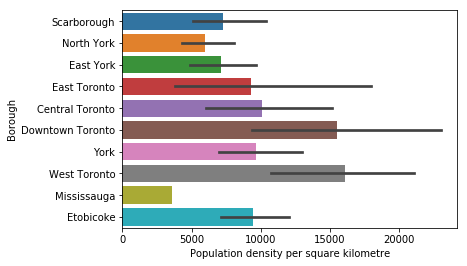

In [147]:
sns.barplot(y='Borough', x='Population density per square kilometre', data=df1)
df1=df1.merge(df0, on=['PostalCode','Borough'], how='inner')

In [148]:
df1.head()

,Unnamed: 0_x,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999",...,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Unnamed: 0_y,Neighbourhood,Latitude,Longitude
0,0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,...,0.84,0.55,1.32,0.16,0.15,14.64,6,"Rouge,Malvern",43.806686,-79.194353
1,1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,...,0.68,0.68,0.80,1.04,0.28,25.49,12,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,...,0.50,0.90,1.29,0.37,0.53,43.03,18,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,...,1.14,0.59,2.47,0.39,0.19,23.36,22,Woburn,43.770992,-79.216917
4,4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,...,1.12,1.03,2.72,0.68,0.52,26.77,26,Cedarbrae,43.773136,-79.239476


#### * Total House Income

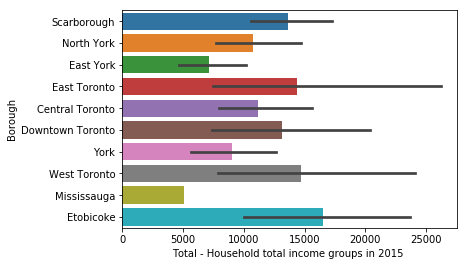

In [149]:
sns.barplot(y='Borough', x='Total - Household total income groups in 2015 ', data=df1)

#### * Income Capita and Borough

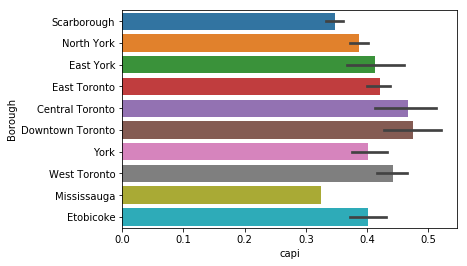

In [150]:
df1['capi'] = df1['Total - Household total income groups in 2015 '] / df1['Population, 2016']
sns.barplot(y='Borough', x='capi', data=df1)

#### * Household Median Income and Borough

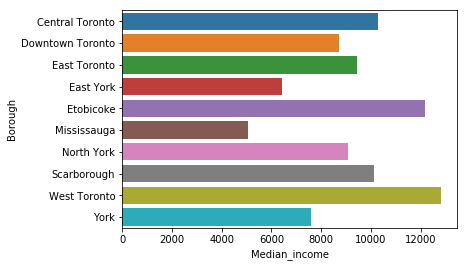

In [151]:
Meidan_income_Borough = df1.groupby(['Borough'])['Total - Household total income groups in 2015 ','    Korean'].median()
income = pd.DataFrame(Meidan_income_Borough)
income = income.rename(columns={"Total - Household total income groups in 2015 ": "Median_income", '    Korean': 'Korean'}).reset_index()
income.head()
#df1['Borough'].unique()
sns.barplot(x='Median_income', y='Borough', data=income)

#### * Korean Population Ratio and Borough

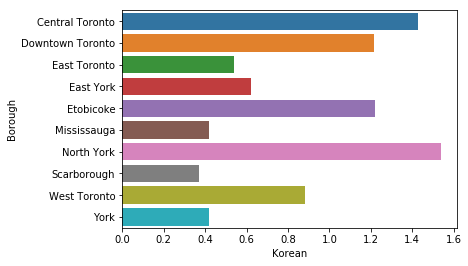

In [152]:
sns.barplot(x='Korean', y='Borough', data=income)

In [158]:
df1.groupby(['Borough',])['Total - Household total income groups in 2015 ','    Korean'].mean().reset_index()

,Borough,Total - Household total income groups in 2015,Korean
0,Central Toronto,11207.777778,1.317778
1,Downtown Toronto,13132.500000,1.444167
2,East Toronto,14381.666667,0.573333
3,East York,7121.000000,0.744000
4,Etobicoke,16520.000000,1.542000
5,Mississauga,5055.000000,0.420000
6,North York,10755.500000,2.973000
7,Scarborough,13652.941176,0.415882
8,West Toronto,14681.666667,0.871667
9,York,9021.000000,0.536000


In [157]:
df1.groupby(['Borough',])['Total - Household total income groups in 2015 ','    Korean'].median().reset_index()

,Borough,Total - Household total income groups in 2015,Korean
0,Central Toronto,10285.0,1.430
1,Downtown Toronto,8712.5,1.215
2,East Toronto,9425.0,0.540
3,East York,6435.0,0.620
4,Etobicoke,12175.0,1.220
5,Mississauga,5055.0,0.420
6,North York,9067.5,1.540
7,Scarborough,10105.0,0.370
8,West Toronto,12825.0,0.880
9,York,7595.0,0.420


### Korean Restaurant Popular Neighborhoods

    ----Newtonbrook,Willowdale----

                         venue  freq
               
          0  Korean Restaurant   0.4
          1    Thai Restaurant   0.2
          2        Coffee Shop   0.2


# V. Discussion

- Korean population dense boroughs are 'North York' and 'Central Toronto'
- The household income are also in the middle class range
- According to FourSquare data, the most popular restaurant venue at neighborhoods of Newtonbrook and Willowdale in 'North York' borough is Korean restaurant

# VI. Conclustion
- From the observations, Newtonbrook and Willowdale in 'North York' are recommended for the first restaurant of the Korean restaurant chain.